In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from io import open
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(17)

In [2]:
from markets.stocks_model import create_stocks
from markets.stocks_model import create_chart_data

In [3]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (12,4)})

#### Repeatable random: Always set a seed!

In [6]:
np.random.seed(17)

In [7]:
stocks = create_stocks(10)
stocks

{'HOKU': <markets.dynamic_market.Stock at 0x129519ad0>,
 'OPMH': <markets.dynamic_market.Stock at 0x12952e510>,
 'SHFV': <markets.dynamic_market.Stock at 0x12952e4d0>,
 'PYFC': <markets.dynamic_market.Stock at 0x12952e690>,
 'KLNM': <markets.dynamic_market.Stock at 0x12952e850>,
 'RDLX': <markets.dynamic_market.Stock at 0x12952e610>,
 'UBYR': <markets.dynamic_market.Stock at 0x12952e710>,
 'WSUJ': <markets.dynamic_market.Stock at 0x12952e890>,
 'DZBP': <markets.dynamic_market.Stock at 0x12952e490>,
 'UVVA': <markets.dynamic_market.Stock at 0x12952e8d0>}

In [29]:
config = {
    'num_investors': 10,
    'num_days': 128 + 1024, # 4 years with half a year of history
    'num_rounds_per_day': 5
}

In [30]:
%time chart_data = create_chart_data(stocks, config)
chart_data

CPU times: user 1min 13s, sys: 1.56 s, total: 1min 14s
Wall time: 1min 14s


{'HOKU': {'price': array([65.537, 66.937, 65.337, ..., 74.937, 74.737, 74.937]),
  'epv': array([65.66, 65.65, 65.65, ..., 74.5 , 74.57, 74.65])},
 'OPMH': {'price': array([ 64.86,  65.66,  65.26, ..., 161.66, 161.46, 161.46]),
  'epv': array([ 63.95,  63.99,  64.04, ..., 164.64, 164.88, 165.11])},
 'SHFV': {'price': array([ 69.106,  68.906,  68.906, ..., 196.906, 197.906, 197.106]),
  'epv': array([ 69.77,  69.84,  69.92, ..., 206.57, 206.77, 206.97])},
 'PYFC': {'price': array([66.476, 66.876, 68.276, ..., 94.676, 94.876, 96.076]),
  'epv': array([66.49, 66.5 , 66.51, ..., 94.73, 94.85, 94.98])},
 'KLNM': {'price': array([ 67.616,  68.016,  67.816, ..., 114.216, 114.016, 115.416]),
  'epv': array([ 68.59,  68.61,  68.64, ..., 118.58, 118.71, 118.85])},
 'RDLX': {'price': array([52.082, 52.082, 53.082, ..., 82.482, 82.282, 82.482]),
  'epv': array([52.1 , 52.12, 52.13, ..., 84.85, 84.94, 85.02])},
 'UBYR': {'price': array([59.008, 59.408, 59.608, ..., 55.608, 55.808, 56.608]),
  'epv'

In [33]:
num_files = 2
num_records = 10
t = time.time()
for file_no in range(1, num_files+1):
    with open('synthetic_eod/training-%i.md.pkl' % file_no, 'wb') as file:
        for rec_no in range(num_records):
            chart_data = create_chart_data(stocks, config)
            dt = int(time.time() - t)
            t = time.time()
            print("after %s seconds - dumping record no %s into file %s" % (dt, rec_no, file_no))
            pickle.dump(chart_data, file)

after 74 seconds - dumping record no 0 into file 1
after 74 seconds - dumping record no 1 into file 1
after 74 seconds - dumping record no 2 into file 1
after 74 seconds - dumping record no 3 into file 1
after 74 seconds - dumping record no 4 into file 1
after 74 seconds - dumping record no 5 into file 1
after 74 seconds - dumping record no 6 into file 1
after 74 seconds - dumping record no 7 into file 1
after 74 seconds - dumping record no 8 into file 1
after 74 seconds - dumping record no 9 into file 1
after 74 seconds - dumping record no 0 into file 2
after 74 seconds - dumping record no 1 into file 2
after 75 seconds - dumping record no 2 into file 2
after 77 seconds - dumping record no 3 into file 2
after 75 seconds - dumping record no 4 into file 2
after 74 seconds - dumping record no 5 into file 2
after 74 seconds - dumping record no 6 into file 2
after 75 seconds - dumping record no 7 into file 2
after 75 seconds - dumping record no 8 into file 2
after 75 seconds - dumping reco

In [31]:
from drl.trading_model import MarketEnvironment, EnvironmentFactory

In [32]:
# One million in cash and 100'000 worth of every available stock
portfolio= [1e6] + 10 * [1e5]
print(portfolio)

[1000000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0]


Our enviroments are all created from files containing some precomputed market history. All the files must contain data for the same securities and sentiment history.

In [36]:
factory = EnvironmentFactory(pattern="synthetic_eod/*.md.pkl", 
                             duration=1024, 
                             n_hist=128, 
                             portfolio=portfolio, 
                             return_scale=100, 
                             weight_scale=10, 
                             fee = 2.5e-3)

In our market environment, 10 different securities are being traded.

VSCH


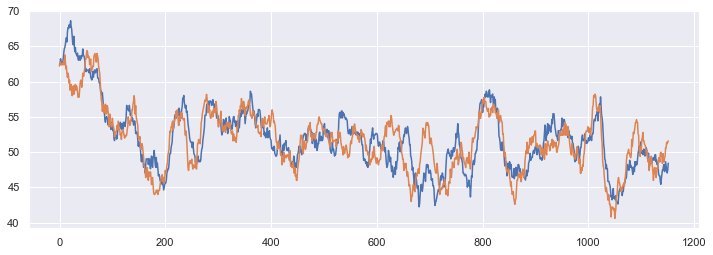

In [56]:
tno = 9
tickers = factory.tickers()
ticker = tickers[tno]
print(ticker)

plt.plot(factory.prices_for(ticker, index=1));
plt.plot(factory.prices_for(ticker, index=0));